In [2]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")

In [4]:
q = "select * from sqlite_master where type = 'table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [5]:
a = "select * from facts limit 5"
pd.read_sql_query(a, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
b = "select MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) from facts"
pd.read_sql_query(b, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [7]:
c = "select name, population from facts where population = 0"
pd.read_sql_query(c, conn)

,name,population
0,Antarctica,0


In [8]:
d = "select name, population from facts where population = 7256490011"
pd.read_sql_query(d, conn)

,name,population
0,World,7256490011


It seems like the table contains a row for the whole world, which explains the population of over 7.2 billion. It also seems like the table contains a row for Antarctica, which explains the population of 0. 


In [19]:
e = "select name, population, population_growth, birth_rate, death_rate from facts where population != (select min(population) from facts) and population != (select max(population) from facts);"
population = pd.read_sql_query(e, conn)
print(population.head())

          name  population  population_growth  birth_rate  death_rate
0  Afghanistan    32564342               2.32       38.57       13.89
1      Albania     3029278               0.30       12.92        6.58
2      Algeria    39542166               1.84       23.67        4.31
3      Andorra       85580               0.12        8.13        6.96
4       Angola    19625353               2.78       38.78       11.49


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0af2cc1438>,
      dtype=object)

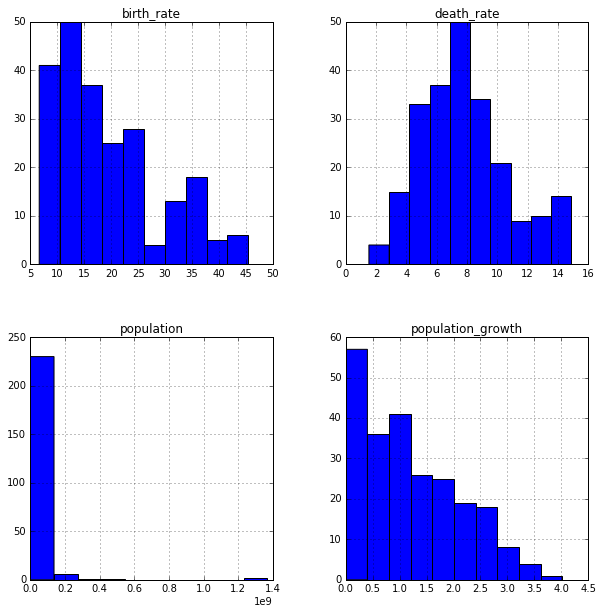

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

population.hist(ax=ax)